In [1]:
import sys
import os
import numpy as np
from tqdm import tqdm
import pickle

# Get the parent folder path (folder K)
parent_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(parent_folder)

# Add folder A to the Python path
folder_classes_path = os.path.join(parent_folder, 'classes')
sys.path.append(folder_classes_path)

/Users/zeyichen/GitHub/Repo/WB_Algo/Stochastic_FP


Load all necessary classes and functions.

In [2]:
from true_WB import *
from input_generate_plugin import *
from entropic_estimate_OT import *
from entropic_iterative_scheme import *
from config_log import *
from measure_visualize import *
from input_generate_entropy import *
from sample_plot import *

Set the parameters.

In [3]:
dim = 2
# dim = 10
num_samples = 5000
num_measures = 5
iter = 0
truncated_radius = 150
seed = 1009

Construct the source_sampler (i.e., the sampler for the ground-truth Wasserstein barycenter). In particular, we consider uniform mixture of 5 Gaussians, and the seed is tuned as 1009 to make the distribution "fancy" (see input_measure_select).

In [4]:
source_sampler = MixtureOfGaussians(dim)
source_sampler.random_components(num_components=5, uniform_weights = True, seed = seed) # seed from the measure selection
# source_sampler.set_truncation(truncated_radius)

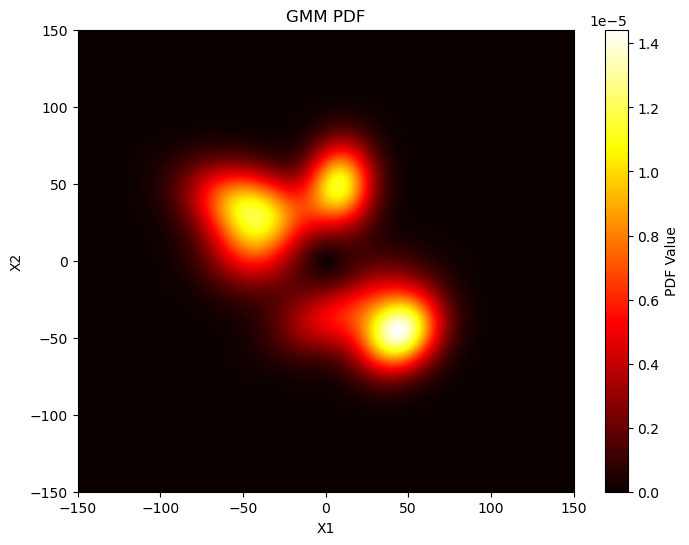

In [5]:
plot_2d_gmm_pdf(source_sampler, truncated_radius, save_path = None)

We now construct tilde_K auxiliary measures as the input to our entropic sampler. These measures are used to provide g and Y for the mappings.

In [6]:
auxiliary_measure_sampler_set = []
for auxiliary_seed in [1010, 1018, 1014, 1016, 1003]:
    auxiliary_measure_sampler = MixtureOfGaussians(dim)
    auxiliary_measure_sampler.random_components(num_components=5, uniform_weights = True, seed = auxiliary_seed)
    # auxiliary_measure_sampler.set_truncation(truncated_radius)
    auxiliary_measure_sampler_set.append(auxiliary_measure_sampler)

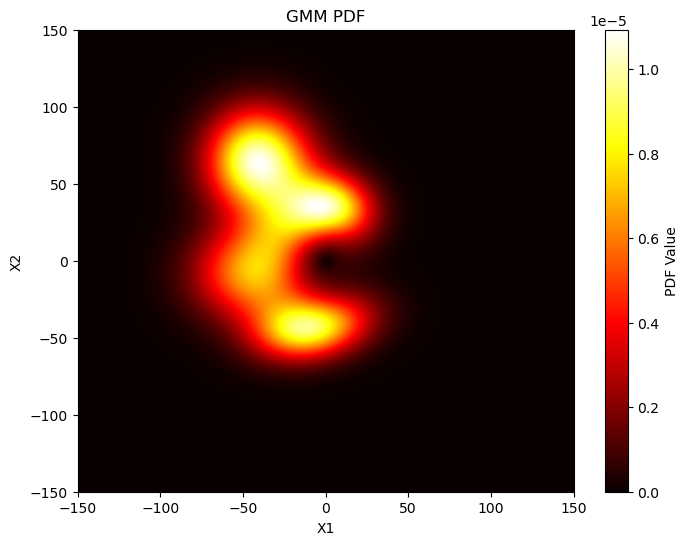

In [7]:
plot_2d_gmm_pdf(auxiliary_measure_sampler_set[4], truncated_radius, save_path = None)

In [8]:
# construct entropic_sampler
entropic_sampler = entropic_input_sampler(dim, num_measures, auxiliary_measure_sampler_set, source_sampler = source_sampler, n_k = 1000, seed = 120, gamma = 0.3, manual = True)

In [9]:
entropic_sampler.__dict__

{'dim': 2,
 'num_measures': 5,
 'auxiliary_measure_sampler_set': [<true_WB.MixtureOfGaussians at 0x181cda350>,
 'tilde_K': 5,
 'source_sampler': <true_WB.MixtureOfGaussians at 0x180d7e6d0>,
 'n_k': 1000,
 'seed': 120,
 'rng_entropy': RandomState(MT19937) at 0x181D19D40,
 'gamma': 0.3,
 'manual': True}

In [10]:
# generate strong convexity parameters of the mappings.
entropic_sampler.generate_strong_convexity_param()
print("strong convexity parameters all set.")

strong convexity parameters all set.


In [11]:
# assign theta
entropic_sampler.assign_theta()
print("theta all set.")

theta all set.


In [12]:
# generate Y matrices
entropic_sampler.generate_Y_matrices()
print("Y matrices all set.")

source sampling:   0%|          | 0/1000 [00:00<?, ?it/s]

source sampling: 100%|██████████| 1000/1000 [00:00<00:00, 10650.20it/s]


Finished generating Y matrix for auxiliary measure 0


source sampling: 100%|██████████| 1000/1000 [00:00<00:00, 11029.37it/s]


Finished generating Y matrix for auxiliary measure 1


source sampling: 100%|██████████| 1000/1000 [00:00<00:00, 10971.87it/s]


Finished generating Y matrix for auxiliary measure 2


source sampling: 100%|██████████| 1000/1000 [00:00<00:00, 7329.55it/s]


Finished generating Y matrix for auxiliary measure 3


source sampling: 100%|██████████| 1000/1000 [00:00<00:00, 10554.39it/s]

Finished generating Y matrix for auxiliary measure 4
Y matrices all set.


In [13]:
# generate g vectors
entropic_sampler.generate_g_vectors()
print("g vectors all set.")


source sampling: 100%|██████████| 1000/1000 [00:00<00:00, 10659.86it/s]


Finished generating g vector for auxiliary measure 0
Finished generating g vector for auxiliary measure 1
Finished generating g vector for auxiliary measure 2
Finished generating g vector for auxiliary measure 3
Finished generating g vector for auxiliary measure 4
g vectors all set.


In [14]:
# generate smoothness parameters; this involves solving max eigen for each tilde_k
entropic_sampler.generate_smoothness_param()
print("smoothness parameters all set.")


tilde_k: 0: 100%|██████████| 200/200 [01:37<00:00,  2.05it/s]


max eigenvalue for 0: 3867.3244429478764.


tilde_k: 1: 100%|██████████| 200/200 [01:39<00:00,  2.02it/s]


max eigenvalue for 1: 1795.4439428248793.


tilde_k: 2: 100%|██████████| 200/200 [01:39<00:00,  2.01it/s]


max eigenvalue for 2: 346.16650094745256.


tilde_k: 3: 100%|██████████| 200/200 [01:37<00:00,  2.05it/s]


max eigenvalue for 3: 1730.0383805077647.


tilde_k: 4: 100%|██████████| 200/200 [01:34<00:00,  2.12it/s]

max eigenvalue for 4: 3207.278916804349.
smoothness parameters all set.


In [15]:
print(entropic_sampler.smoothness_param_dict)

{0: 464.07917315374516, 1: 215.45351313898553, 2: 41.5402201136943, 3: 207.60484566093177, 4: 384.8737100165219}


In [16]:
# construct a surjective mapping to map component maps to their respective OT maps for generating input measures.
entropic_sampler.construct_surjective_mapping()
print("surjective mapping all set.")


surjective mapping all set.


In [17]:
# generate A matrices
entropic_sampler.generate_A_matrices()
print("A matrices all set.")


The V_value record is [495.77735151544147, 18.31888434839084, 18.318780204363975, 18.318780186456024].
A matrices all set.


In [18]:
epsilon = 10
result_dir = "results"
os.makedirs(result_dir, exist_ok=True)
save_pathname = f"{result_dir}/entropic_measures_{num_measures}_seed_{seed}_samples_{num_samples}_dim_{dim}_epsilon_{epsilon}"

In [19]:
import pickle

with open(f"{save_pathname}/entropic_sampler_info.pkl", "wb") as f:
    pickle.dump(entropic_sampler.__dict__, f)

with open(f"{save_pathname}/source_sampler_info.pkl", "wb") as f:
    pickle.dump(source_sampler.__dict__, f)

print(f"Data successfully saved")

Data successfully saved


### Reverse engineer for well-structured input measures.
Display the surjective mapping.

In [ ]:
for key, value in entropic_sampler.surjective_mapping.items():
    print(key, ' : ', value)

# print g_vector_dict
for key, value in entropic_sampler.g_vector_dict.items():
    print(key, ' : ', value[:10])

# # impose entropic_sampler.theta_dict to be all with value 0.5
# entropic_sampler.theta_dict = {key: 0.5 for key in entropic_sampler.theta_dict.keys()}

# for key, value in entropic_sampler.theta_dict.items():
#     print(key, ' : ', value)


0  :  2
1  :  1
2  :  3
3  :  0
4  :  3
5  :  0
6  :  2
7  :  0
8  :  4
9  :  1
0  :  [ 3440.56       -78.863815  4635.4414   -2461.5525   -3483.8208
  2749.4585     710.69574   4007.0286   -1245.5286    2533.0076  ]
1  :  [-1442.3479   4022.6135   2822.3472   -898.7335    651.28577  2277.5166
  -119.83768 -1691.1608   1860.1804   2514.7844 ]
2  :  [ -785.9594   3685.9739   1497.7693   -687.36456   233.40012 -4140.242
  1240.5127  -2356.367    -252.0459    721.7596 ]
3  :  [ -781.6889   1646.302    1293.924   -1818.4458   -488.20035  -260.27942
 -1733.7661  -2084.461    1311.3418  -1451.6841 ]
4  :  [ -328.52313   497.25613  2290.7815  -2463.9004    895.08435   421.81824
  -868.7185  -2850.0195  -3713.2102    467.38843]
0  :  0.5
1  :  0.5
2  :  0.5
3  :  0.5
4  :  0.5


Check whether the sum of A_matrices is 5 * Identity

In [20]:
A_matrices_dict = entropic_sampler.A_matrices_dict
sum_matrix = np.zeros((dim, dim))
for i in range(num_measures):
    sum_matrix += A_matrices_dict[i]
print(f"The sum of the matrices is {sum_matrix}.")

The sum of the matrices is [[5.00000036e+00 5.28365004e-08]
 [5.28365008e-08 4.99999959e+00]].


In [67]:
tilde_K = entropic_sampler.tilde_K
sample_size = 1000
batch_sample_collection = {k: [] for k in range(num_measures)}
candidate_sample_collection = {k: [] for k in range(2 * tilde_K)}

source_samples = source_sampler.sample(sample_size, multiplication_factor = 1)
# measure_samples = self.generate_input_measure_sample(source_samples[0])

for i in tqdm(range(sample_size), desc= f"Generating {sample_size} input measure samples"):
    x = source_samples[i]
    measure_samples_dict, candidate_map_dict = entropic_sampler.generate_input_measure_sample(x, gamma = 0.5) # a dictionary with k keys
    for k in range(num_measures):
        batch_sample_collection[k].append(measure_samples_dict[k])
    for k in range(2 * tilde_K):
        candidate_sample_collection[k].append(candidate_map_dict[k])

Generating 1000 input measure samples: 100%|██████████| 1000/1000 [00:03<00:00, 254.39it/s]


In [68]:
lambda_list = []
for i in range(tilde_K):
    lambda_list.append(entropic_sampler.smoothness_param_dict[i])
lambda_list

[91.28243289523436,
 202.25870948704318,
 120.89613186313049,
 40.376628053416184,
 102.59304369545366]

In [82]:
gamma = 0.5
alpha_4 = 5 * (1 - gamma) / (3* lambda_list[4])
print(alpha_4)

0.008122707966507693


In [83]:
add_on_matrix = np.array([[0, 0.8], [0.8, 0]])

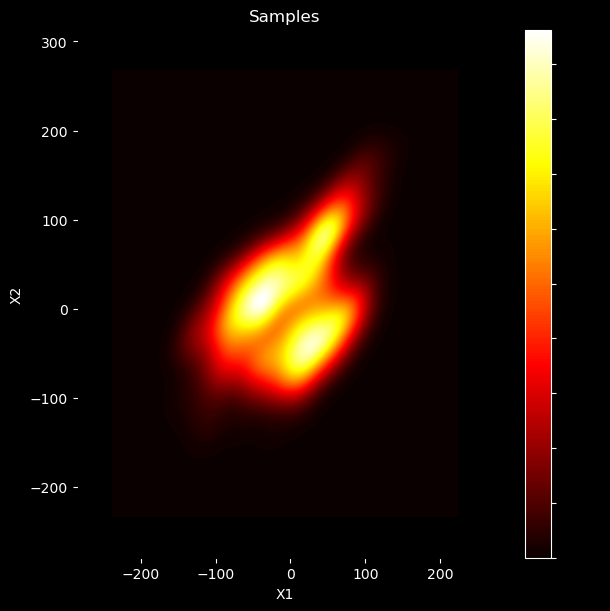

In [84]:
# source_samples = source_sampler.sample(sample_size, multiplication_factor = 1)
A_matrices_dict = entropic_sampler.A_matrices_dict
sample_combine = 0 * np.array(candidate_sample_collection[1]) + alpha_4 * np.array(candidate_sample_collection[9])
T1_sample = sample_combine + gamma * source_samples @ (A_matrices_dict[0] + A_matrices_dict[4] + 2 * add_on_matrix) 
# check
# print(T1_sample - batch_sample_collection[1])
plot_2d_source_measures_kde(T1_sample, plot_dirc = None, scatter = False)

[[ 11.41426275   3.85472329]
 [-20.9917486   34.44184412]
 [ -7.26117844  35.86816174]
 ...
 [  0.73884245  41.0627997 ]
 [-39.38552121  -8.50302167]
 [  0.49583953  55.77608372]]


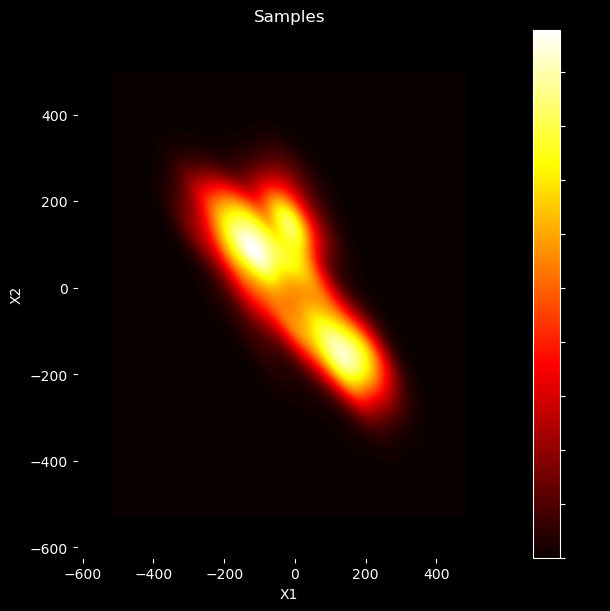

In [85]:
alpha_2 = 5 * (1 - gamma) / (3* lambda_list[2])
alpha_3 = 5 * (1 - gamma) / (3* lambda_list[3])
sample_combine = 0 * np.array(candidate_sample_collection[3]) + alpha_2 * np.array(candidate_sample_collection[5]) + alpha_3 * np.array(candidate_sample_collection[7])
# source_samples = source_sampler.sample(sample_size, multiplication_factor = 1)
T0_sample = sample_combine + gamma * source_samples @ (A_matrices_dict[3] + A_matrices_dict[1]+ A_matrices_dict[2] - 2 * add_on_matrix)
# check
print(T0_sample - batch_sample_collection[0])
plot_2d_source_measures_kde(T0_sample, plot_dirc = None, scatter = False)

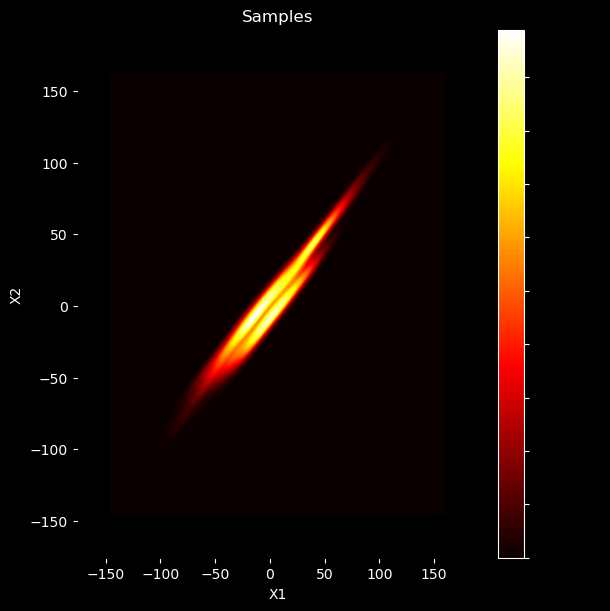

In [88]:
add_on_matrix = np.array([[0, 0.8], [0.8, 0]])
matrix_transform_1 = gamma * source_samples @ (A_matrices_dict[0] + A_matrices_dict[4] + 2 * add_on_matrix) 
plot_2d_source_measures_kde(matrix_transform_1, plot_dirc = None, scatter = False)


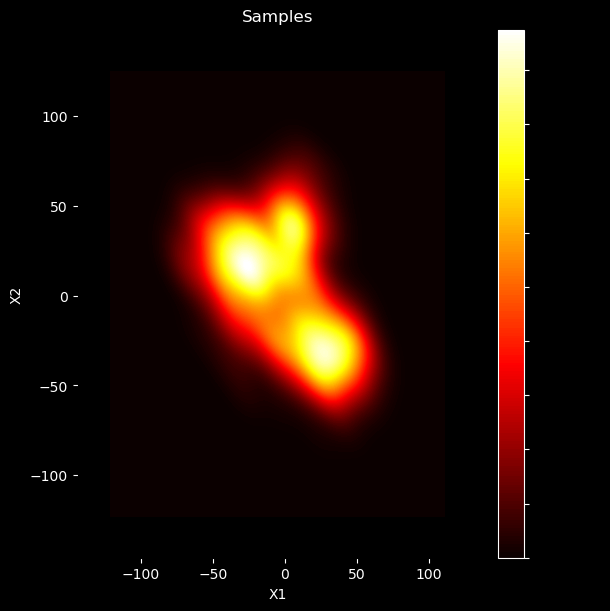

In [89]:
sample_combine = 0 * np.array(candidate_sample_collection[1]) + alpha_4 * np.array(candidate_sample_collection[9])
plot_2d_source_measures_kde(sample_combine, plot_dirc = None, scatter = False)

In [58]:
# print all A matrices
for key, value in A_matrices_dict.items():
    print(key, ' : ', value)

0  :  [[ 0.83537197 -0.03716279]
 [-0.03716279  0.87592173]]
1  :  [[ 1.02832775 -0.05693294]
 [-0.05693294  0.9036258 ]]
2  :  [[1.13590171 0.24485292]
 [0.24485292 1.19892368]]
3  :  [[ 1.04373935 -0.09721359]
 [-0.09721359  1.18114576]]
4  :  [[ 0.95665958 -0.05354355]
 [-0.05354355  0.84038263]]


Check that involving add_on_matrix preserves PSD properties.

In [87]:
# extract each A matrix by add_on_matrix
# print corresponding eigenvalues
add_on_matrix = np.array([[0, 0.8], [0.8, 0]])
for key, value in A_matrices_dict.items():
    print(key, ' : ', np.linalg.eig(value + add_on_matrix)[0])
for key, value in A_matrices_dict.items():
    print(key, ' : ', np.linalg.eig(value - add_on_matrix)[0])

0  :  [0.09254025 1.61875345]
1  :  [1.71165519 0.22029836]
2  :  [0.12208472 2.21274066]
3  :  [0.40630597 1.81857914]
4  :  [1.64723821 0.14980399]
0  :  [0.01823858 1.69305511]
1  :  [1.82517507 0.10677848]
2  :  [0.61137203 1.72345336]
3  :  [0.21260238 2.01228274]
4  :  [1.75404239 0.04299981]


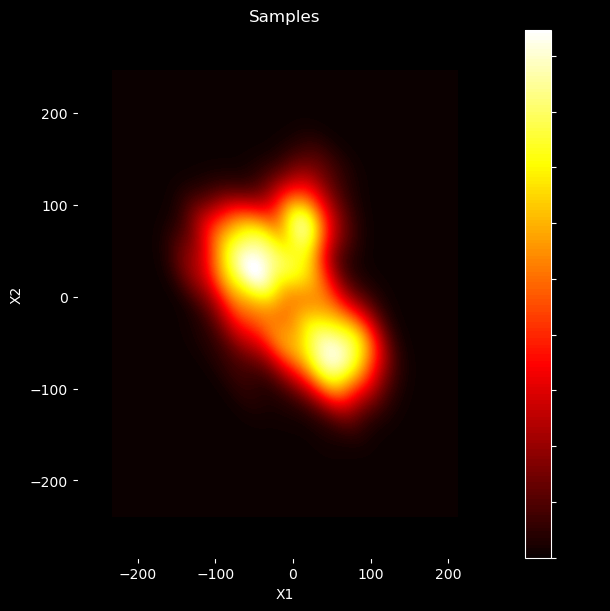

In [90]:

matrix_transform_0 = gamma * source_samples @ (A_matrices_dict[3] + A_matrices_dict[1]+ A_matrices_dict[2])
plot_2d_source_measures_kde(matrix_transform_0, plot_dirc = None, scatter = False)

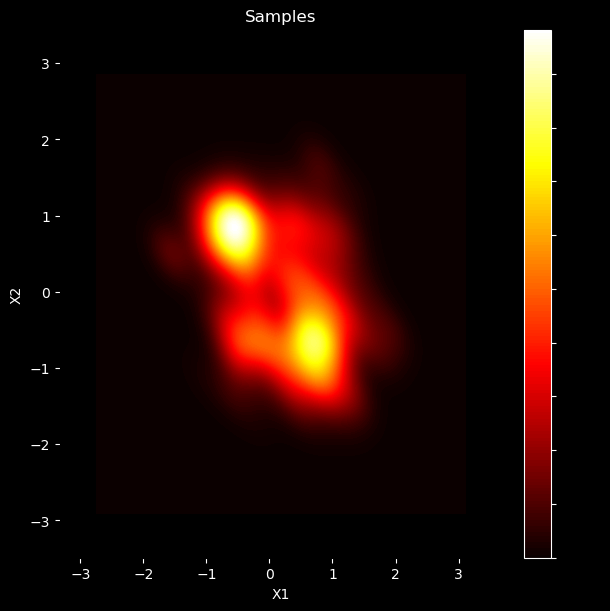

In [91]:
T_2_sample = alpha_3 * np.array(candidate_sample_collection[6])
plot_2d_source_measures_kde(T_2_sample, plot_dirc = None, scatter = False)

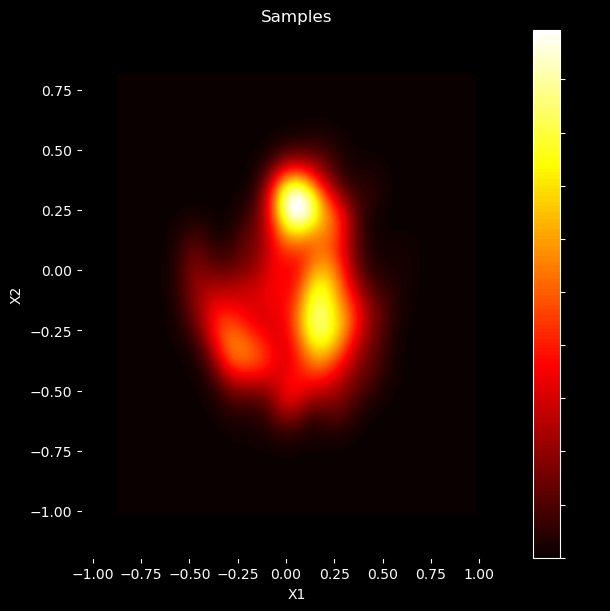

In [92]:
T_3_sample = alpha_2* np.array(candidate_sample_collection[4])
plot_2d_source_measures_kde(T_3_sample, plot_dirc = None, scatter = False)

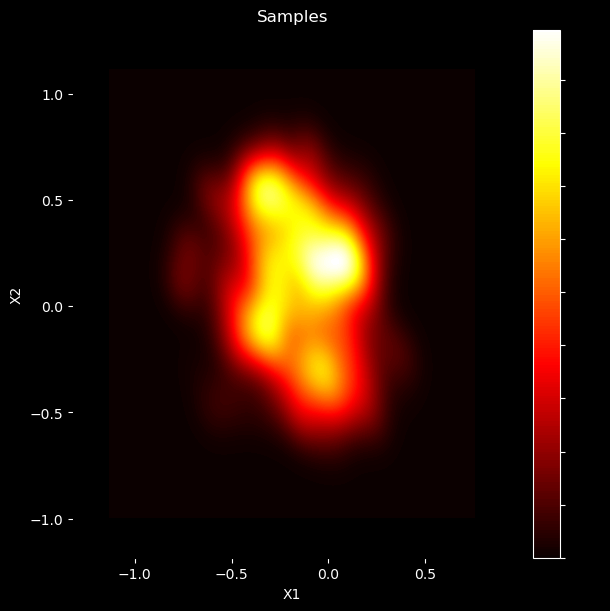

In [93]:
T_4_sample = alpha_4 * np.array(candidate_sample_collection[8])
plot_2d_source_measures_kde(T_4_sample, plot_dirc = None, scatter = False)

### Setting over. ALgorithm starts.

### Generate input measures

In [20]:
epsilon = 10 # the entropic parameter used in the iterative scheme.
num_samples = 5000

In [21]:
result_dir = "results"
os.makedirs(result_dir, exist_ok=True)
save_pathname = f"{result_dir}/entropic_measures_{num_measures}_seed_{seed}_samples_{num_samples}_dim_{dim}_epsilon_{epsilon}"

Load the entropic_sampler.

In [22]:
with open(f"{save_pathname}/entropic_sampler_info.pkl", "rb") as f:
    loaded_data_entropic_sampler = pickle.load(f)

with open(f"{save_pathname}/source_sampler_info.pkl", "rb") as f:
    loaded_data_source_sampler = pickle.load(f)

print("Loaded Data for Entropic Sampler:", loaded_data_entropic_sampler)
print("Loaded Data for Source Sampler:", loaded_data_source_sampler)


Loaded Data for Entropic Sampler: {'dim': 2, 'num_measures': 5, 'auxiliary_measure_sampler_set': [<true_WB.MixtureOfGaussians object at 0x1822a6550>, <true_WB.MixtureOfGaussians object at 0x1824ad410>, <true_WB.MixtureOfGaussians object at 0x1824a98d0>, <true_WB.MixtureOfGaussians object at 0x1824aac90>, <true_WB.MixtureOfGaussians object at 0x18242e290>], 'tilde_K': 5, 'source_sampler': <true_WB.MixtureOfGaussians object at 0x1824c6190>, 'n_k': 1000, 'seed': 120, 'rng_entropy': RandomState(MT19937) at 0x18226D340, 'gamma': 0.3, 'manual': True, 'strong_convexity_param_dict': {0: 0.0001, 1: 0.0001, 2: 0.0001, 3: 0.0001, 4: 0.0001}, 'theta_dict': {0: 10, 1: 10, 2: 10, 3: 10, 4: 10}, 'Y_matrix_dict': {0: array([[ 83.25389778,  -6.77748404],
       [-24.38674772, -23.76266702],
       [ 97.2196175 ,  -0.66185246],
       ...,
       [-35.17059538,  10.05658482],
       [-14.49614928, -84.75519572],
       [-10.84955811, -17.94279971]]), 1: array([[-16.97145061,  91.46456815],
       [ 98.1

In [23]:
source_sampler = MixtureOfGaussians(dim)
source_sampler.__dict__.update(loaded_data_source_sampler)

entropic_sampler = entropic_input_sampler(dim, num_measures, auxiliary_measure_sampler_set, source_sampler = source_sampler, n_k = 1000, seed = 120)
entropic_sampler.__dict__.update(loaded_data_entropic_sampler)

In [24]:
iterative_computer = entropic_iterative_scheme(dim, 
                             num_measures, 
                             source_sampler, 
                             entropic_sampler, 
                             source_sampler_seed = 1009,
                             log = True)

source sampling: 100%|██████████| 5000/5000 [00:00<00:00, 10973.88it/s]


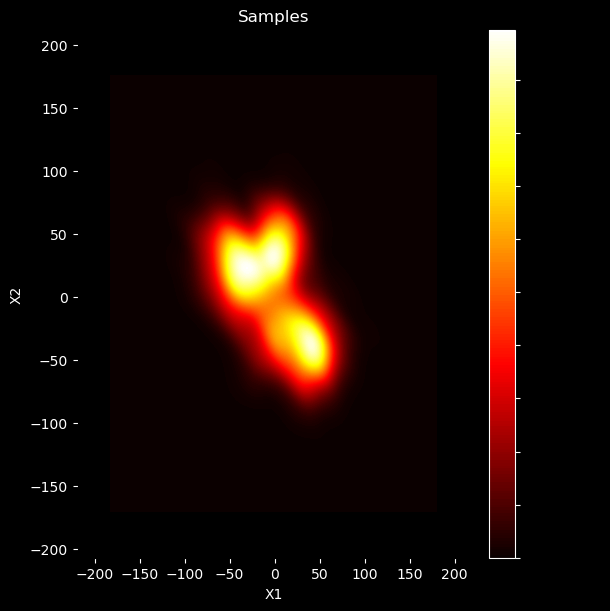

In [25]:
source_measure_samples = source_sampler.sample(num_samples, multiplication_factor=1)
plot_2d_source_measures_kde(source_measure_samples[:2000], plot_dirc = None, scatter = False)

In [26]:
# source and input measures visualization
plot_dirc = f"{save_pathname}/plots"
os.makedirs(plot_dirc, exist_ok=True)

visualize_num_samples = 1000

source_measure_samples = source_sampler.sample(visualize_num_samples, multiplication_factor=1)
print("Start to plot the source measure")
plot_2d_source_measures_kde(source_measure_samples, plot_dirc = plot_dirc, scatter = False)
print("Finish plotting the input measures")

input_measure_samples = entropic_sampler.sample(visualize_num_samples)
for measure_index in range(num_measures):
    measure_samples = np.array(input_measure_samples[measure_index])
    print(f"Start to plot the input measure {measure_index}")
    plot_2d_input_measure_kde(measure_samples, measure_index, scatter = False, plot_dirc = plot_dirc)
    print(f"Finish plotting the input measure {measure_index}")




source sampling: 100%|██████████| 1000/1000 [00:00<00:00, 10915.62it/s]


Start to plot the source measure
Finish plotting the input measures


Generating 1000 input measure samples: 100%|██████████| 1000/1000 [00:03<00:00, 257.88it/s]


Start to plot the input measure 0
Finish plotting the input measure 0
Start to plot the input measure 1
Finish plotting the input measure 1
Start to plot the input measure 2
Finish plotting the input measure 2
Start to plot the input measure 3
Finish plotting the input measure 3
Start to plot the input measure 4
Finish plotting the input measure 4


### Start the iterative scheme


In [27]:
source_measure_samples = source_sampler.sample(num_samples, multiplication_factor=1)

source sampling: 100%|██████████| 5000/5000 [00:00<00:00, 11137.07it/s]


In [28]:
record = []
for i in range(10):
    x = source_measure_samples[i]
    measure_samples_dict, candidate_map_dict = entropic_sampler.generate_input_measure_sample(x)
    # compute the average of the arrays in the dictionary
    average_measure = np.zeros((dim, dim))
    for key, value in measure_samples_dict.items():
        average_measure += value
    average_measure /= num_measures
    record.append(average_measure - x)
print(record)

[array([[-6.68982111e-07, -4.62884479e-07],
       [-6.68982111e-07, -4.62884479e-07]]), array([[-4.14247175e-07, -2.22090698e-07],
       [-4.14247175e-07, -2.22090698e-07]]), array([[1.45202375e-06, 9.98577477e-07],
       [1.45202375e-06, 9.98577477e-07]]), array([[5.62277471e-07, 7.54913668e-07],
       [5.62277471e-07, 7.54913668e-07]]), array([[1.85586964e-08, 4.70599577e-07],
       [1.85586964e-08, 4.70599577e-07]]), array([[4.99053034e-07, 5.38211162e-08],
       [4.99053034e-07, 5.38211162e-08]]), array([[8.36568141e-07, 8.17504485e-07],
       [8.36568141e-07, 8.17504485e-07]]), array([[ 2.26808421e-07, -6.40037715e-07],
       [ 2.26808421e-07, -6.40037715e-07]]), array([[1.46844387e-06, 9.70526596e-07],
       [1.46844387e-06, 9.70526596e-07]]), array([[ 3.85526389e-07, -7.80853057e-07],
       [ 3.85526389e-07, -7.80853057e-07]])]


In [29]:
print(num_samples)

5000


In [30]:
input_measure_samples = entropic_sampler.sample(num_samples)

Generating 5000 input measure samples: 100%|██████████| 5000/5000 [00:18<00:00, 271.80it/s]


In [31]:
iterative_computer.V_value_compute(source_measure_samples, input_measure_samples, iter = None, save_pathname = save_pathname)

In [32]:
print(iterative_computer.V_values)

{'true_V_value': 5343.853422592661}


In [33]:
iterative_computer.converge(source_measure_samples, input_measure_samples, iter, num_samples, max_iter=10, epsilon = epsilon, plot = True, scatter = False)

sampling from the pushforward measure at iteration_0: 100%|██████████| 5000/5000 [00:00<00:00, 10173.34it/s]


start to plot
finish plotting


100%|██████████| 5/5 [00:28<00:00,  5.64s/it]
sampling from the pushforward measure at iteration_1: 100%|██████████| 5000/5000 [00:19<00:00, 254.26it/s]


start to plot
finish plotting


100%|██████████| 5/5 [06:14<00:00, 74.91s/it] 
sampling from the pushforward measure at iteration_2: 100%|██████████| 5000/5000 [00:38<00:00, 130.53it/s]


start to plot
finish plotting


100%|██████████| 5/5 [06:15<00:00, 75.01s/it] 
sampling from the pushforward measure at iteration_3: 100%|██████████| 5000/5000 [00:59<00:00, 83.40it/s] 


start to plot
finish plotting


100%|██████████| 5/5 [05:34<00:00, 66.93s/it] 
sampling from the pushforward measure at iteration_4: 100%|██████████| 5000/5000 [01:48<00:00, 46.24it/s]


start to plot
finish plotting


100%|██████████| 5/5 [05:29<00:00, 65.80s/it] 
sampling from the pushforward measure at iteration_5: 100%|██████████| 5000/5000 [01:59<00:00, 41.87it/s]


start to plot
finish plotting


100%|██████████| 5/5 [05:24<00:00, 64.81s/it] 
sampling from the pushforward measure at iteration_6: 100%|██████████| 5000/5000 [02:08<00:00, 38.95it/s]


start to plot
finish plotting


100%|██████████| 5/5 [05:17<00:00, 63.48s/it] 
sampling from the pushforward measure at iteration_7: 100%|██████████| 5000/5000 [02:32<00:00, 32.72it/s]


start to plot
finish plotting


100%|██████████| 5/5 [05:20<00:00, 64.01s/it] 
sampling from the pushforward measure at iteration_8: 100%|██████████| 5000/5000 [02:47<00:00, 29.93it/s]


start to plot
finish plotting


100%|██████████| 5/5 [05:24<00:00, 64.80s/it] 
sampling from the pushforward measure at iteration_9: 100%|██████████| 5000/5000 [03:12<00:00, 25.96it/s]


start to plot
finish plotting


100%|██████████| 5/5 [05:23<00:00, 64.67s/it] 


In [36]:
iter = 10
max_iter = 20
iterative_computer.converge(source_measure_samples, input_measure_samples, iter, num_samples, max_iter=max_iter, epsilon = epsilon, plot = True, scatter = False)

sampling from the pushforward measure at iteration_10: 100%|██████████| 5000/5000 [13:26<00:00,  6.20it/s]  


start to plot
finish plotting


  0%|          | 0/5 [00:00<?, ?it/s]2025-01-14 08:16:41.335937: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 14m43.207235s

********************************
[Compiling module jit_while] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
100%|██████████| 5/5 [4:33:31<00:00, 3282.20s/it]    
sampling from the pushforward measure at iteration_11: 100%|██████████| 5000/5000 [05:14<00:00, 15.89it/s]


start to plot
finish plotting


100%|██████████| 5/5 [05:21<00:00, 64.39s/it] 
sampling from the pushforward measure at iteration_12: 100%|██████████| 5000/5000 [04:31<00:00, 18.41it/s]


start to plot
finish plotting


100%|██████████| 5/5 [04:59<00:00, 59.95s/it] 
sampling from the pushforward measure at iteration_13: 100%|██████████| 5000/5000 [05:04<00:00, 16.41it/s]


start to plot
finish plotting


100%|██████████| 5/5 [06:55<00:00, 83.15s/it] 
sampling from the pushforward measure at iteration_14: 100%|██████████| 5000/5000 [05:18<00:00, 15.70it/s]


start to plot
finish plotting


100%|██████████| 5/5 [06:08<00:00, 73.67s/it] 
sampling from the pushforward measure at iteration_15: 100%|██████████| 5000/5000 [05:31<00:00, 15.07it/s]


start to plot
finish plotting


100%|██████████| 5/5 [19:42<00:00, 236.45s/it]
sampling from the pushforward measure at iteration_16: 100%|██████████| 5000/5000 [19:09<00:00,  4.35it/s] 


start to plot
finish plotting


100%|██████████| 5/5 [05:23<00:00, 64.67s/it] 
sampling from the pushforward measure at iteration_17: 100%|██████████| 5000/5000 [07:03<00:00, 11.81it/s]


start to plot
finish plotting


100%|██████████| 5/5 [04:59<00:00, 59.90s/it] 
sampling from the pushforward measure at iteration_18: 100%|██████████| 5000/5000 [07:24<00:00, 11.24it/s]


start to plot
finish plotting


100%|██████████| 5/5 [05:27<00:00, 65.45s/it] 
sampling from the pushforward measure at iteration_19: 100%|██████████| 5000/5000 [08:12<00:00, 10.16it/s]


start to plot
finish plotting


100%|██████████| 5/5 [05:23<00:00, 64.70s/it] 
